In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as smf
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold, GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report, \
roc_curve, roc_auc_score , recall_score , precision_score, f1_score
from sklearn.feature_selection import RFE


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [ ]:
data = pd.read_csv('bank-full.csv', delimiter = ';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.shape

(45211, 17)

In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
data[data.duplicated()].shape

(0, 17)

In [ ]:
# List of Numerical Variables
numerical_features=[feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

data[numerical_features].head()


Number of numerical variables: 7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [ ]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [ ]:
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25 and feature not in year_feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 0


In [ ]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


In [ ]:
# Exploratory data analysis

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'balance'),
  Text(2.5, 0, 'day'),
  Text(3.5, 0, 'duration'),
  Text(4.5, 0, 'campaign'),
  Text(5.5, 0, 'pdays'),
  Text(6.5, 0, 'previous')])

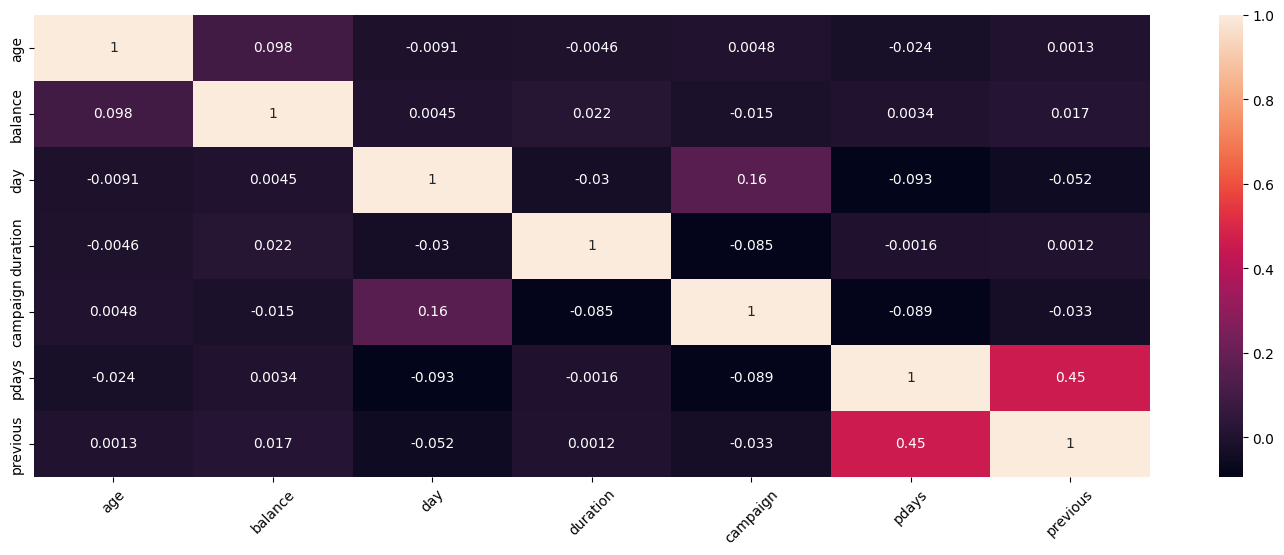

In [ ]:
fig = plt.figure(figsize = (18,6))
sns.heatmap(data.corr(), annot = True);
plt.xticks(rotation = 45)

In [ ]:
# lets analyze the continuous values by creating hist to understand the distribution of the numerical feutures

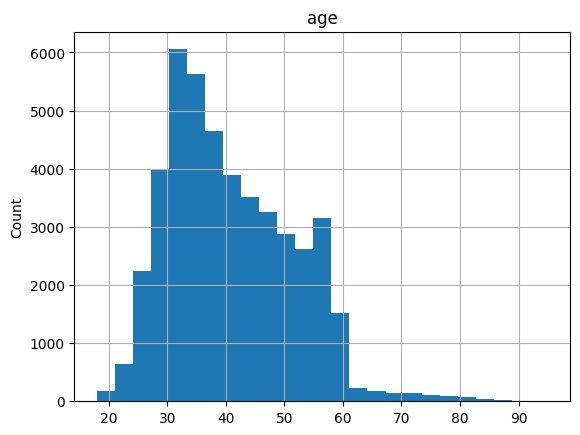

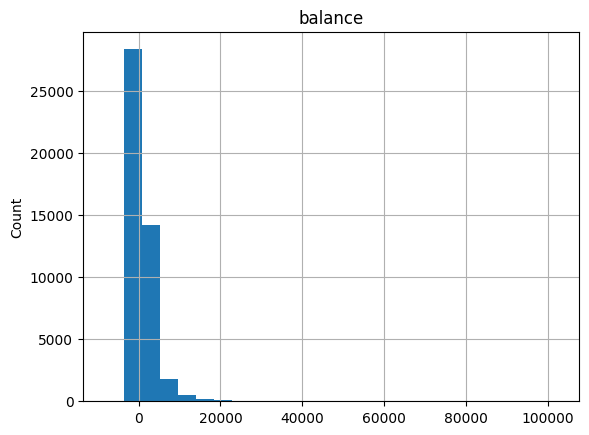

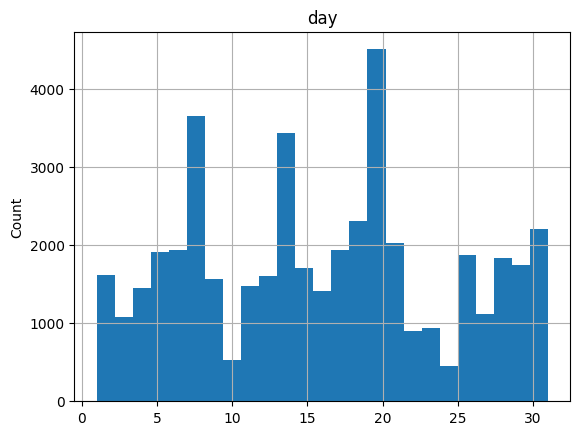

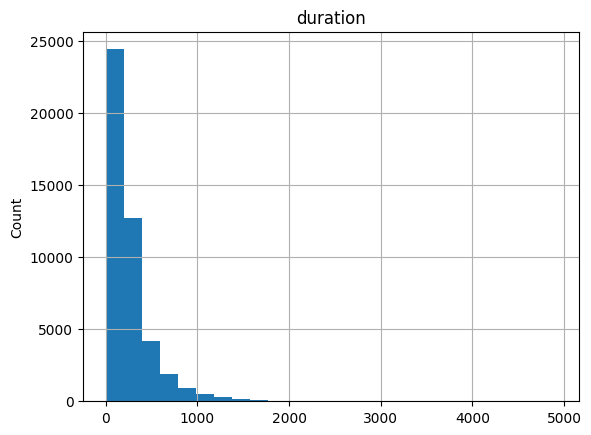

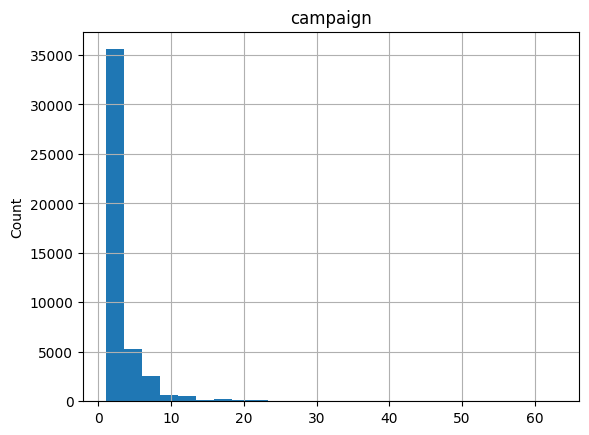

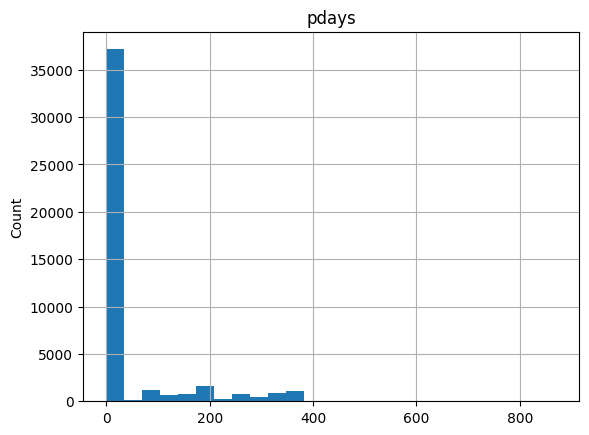

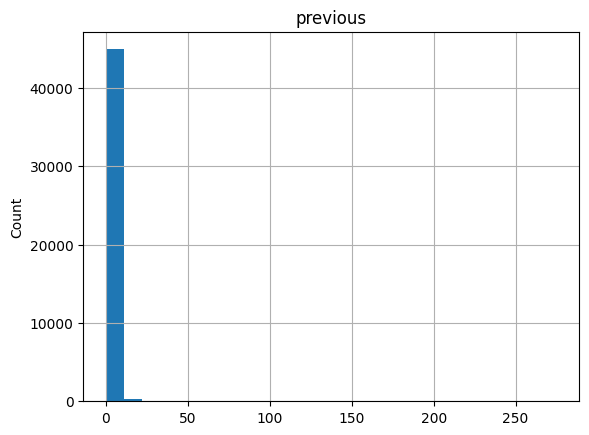

In [ ]:
for feature in continuous_feature:
  data = data.copy()
  data[feature].hist(bins = 25)
  plt.ylabel('Count')
  plt.title(feature)
  plt.show()

In [ ]:
# Log transformation

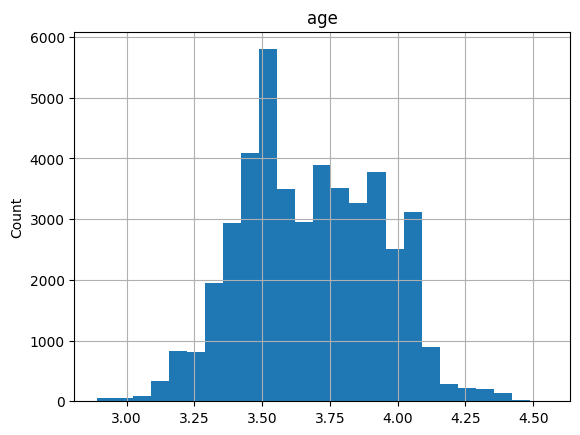

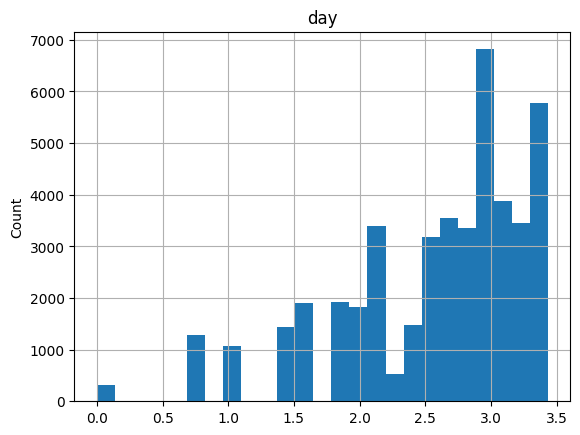

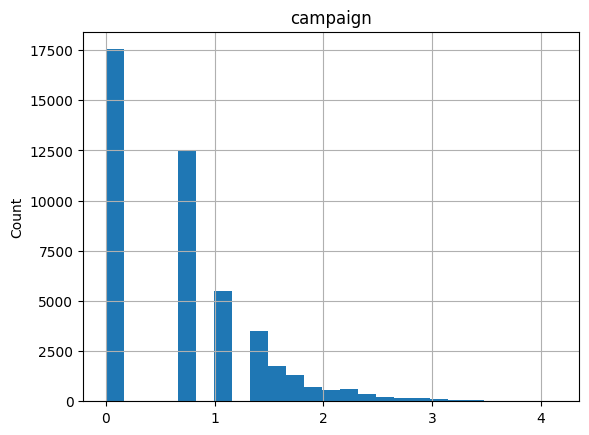

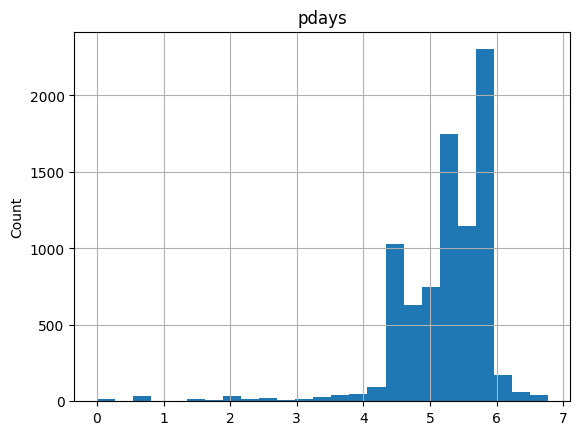

In [ ]:
for feature in continuous_feature:
    data=data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data[feature].hist(bins=25)
        plt.ylabel('Count')
        plt.title(feature)
        plt.show()

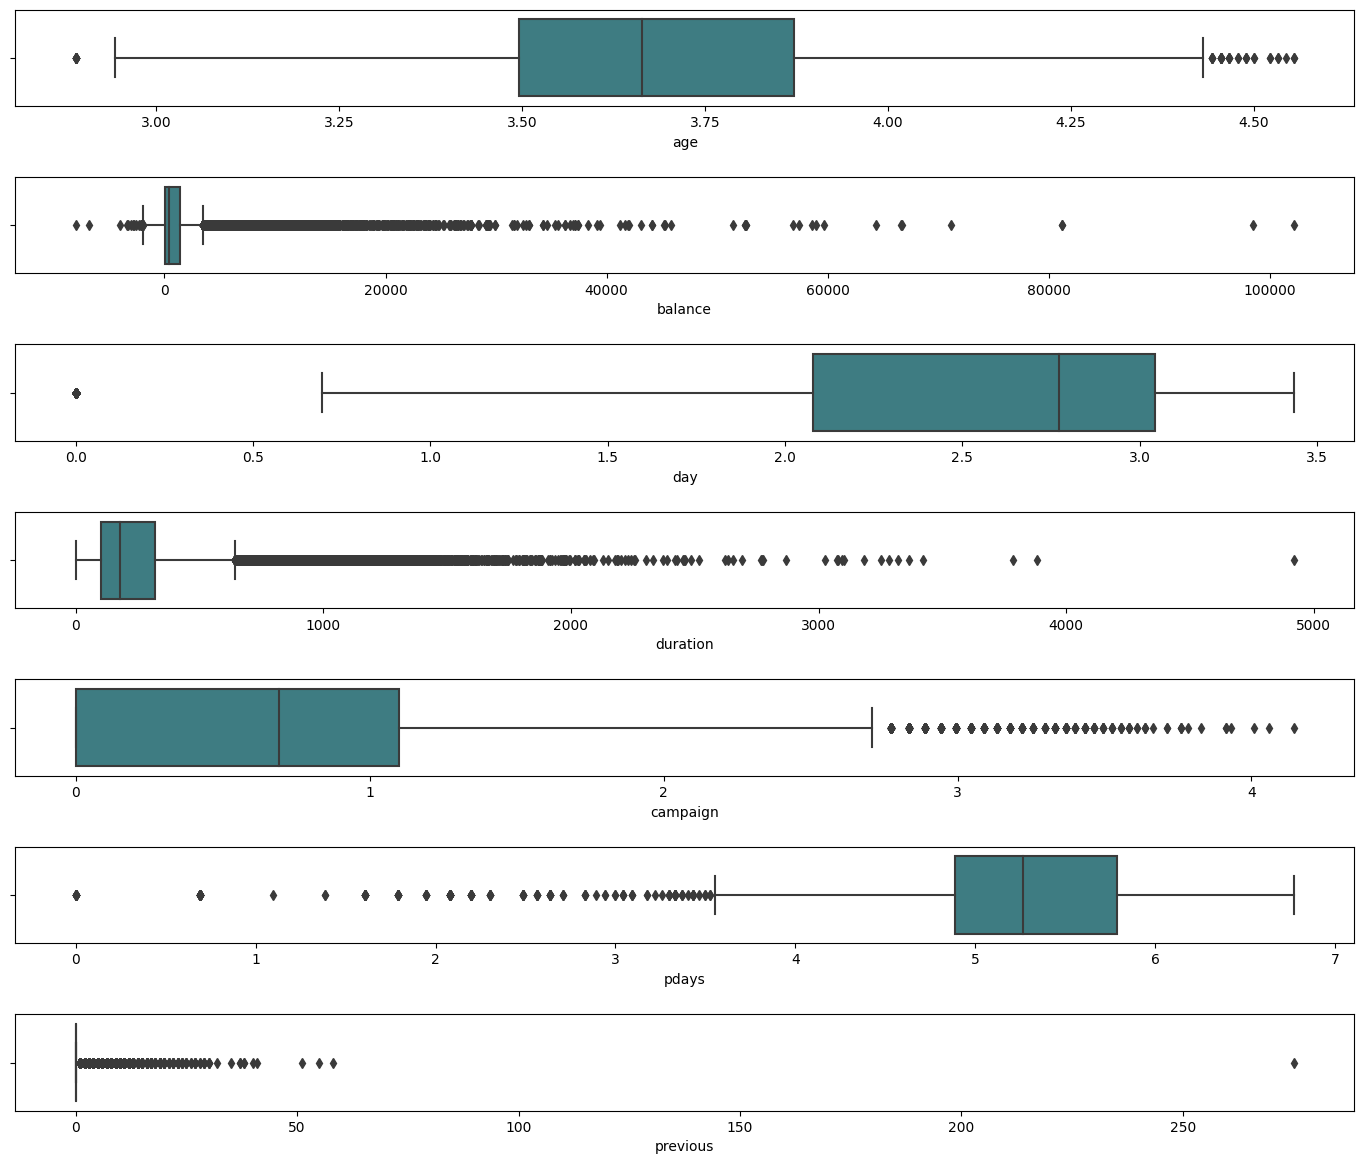

In [ ]:
ot=data.copy()
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='age',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='balance',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='day',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='duration',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='campaign',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='pdays',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='previous',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

In [ ]:
# There are lot of outliers present in the dataframe but we can't drop them bez they are present in a very large quantity and can be important for model building

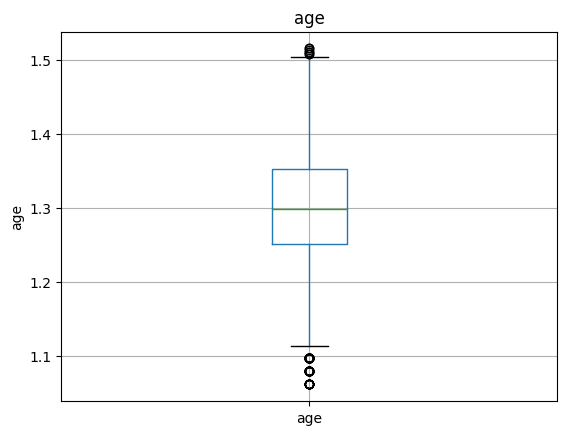

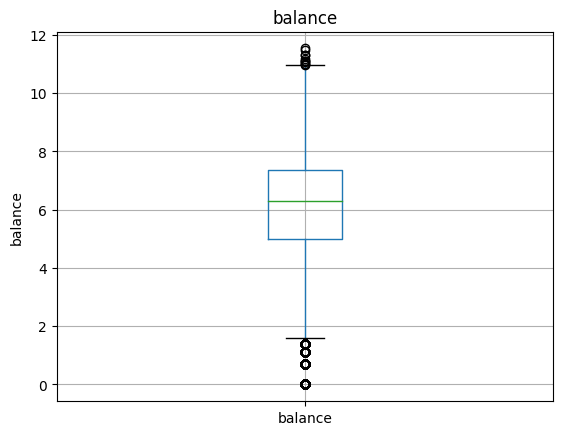

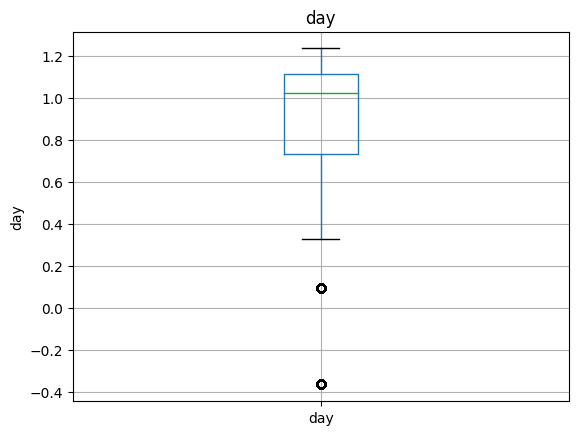

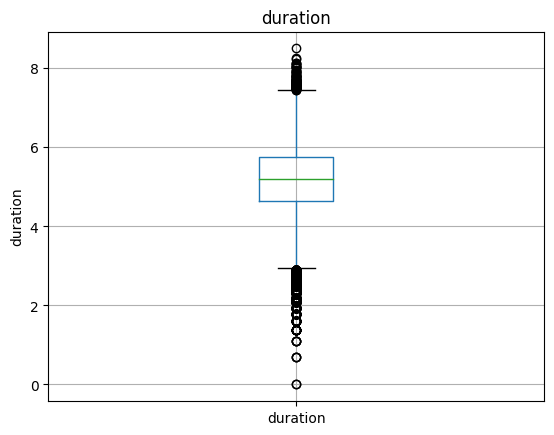

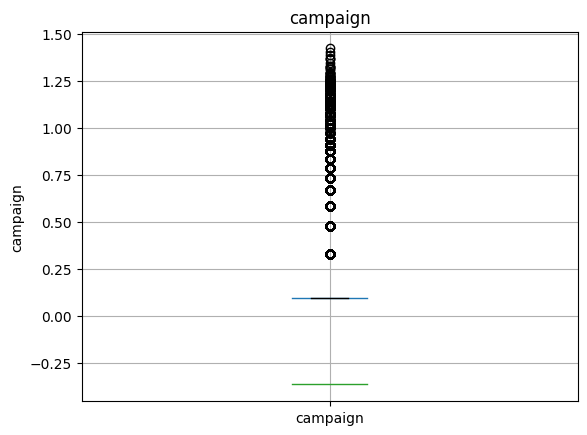

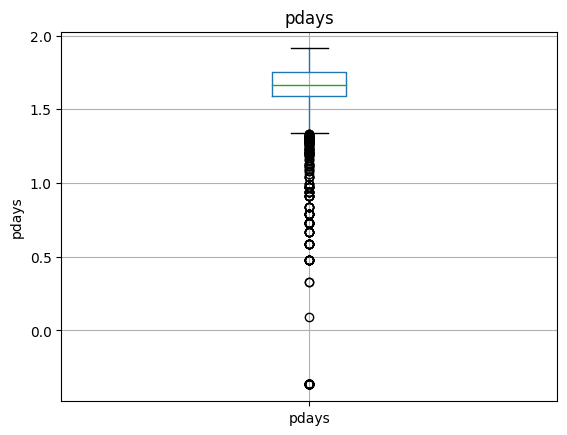

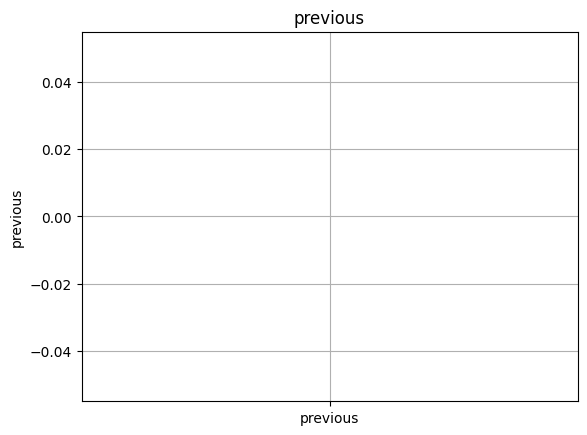

In [ ]:
for feature in continuous_feature:
    data=data.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [ ]:
data[['age','balance']].describe()

,age,balance
count,45211.000000,4.144500e+04
mean,1.300362,-inf
std,0.069286,NaN
min,1.061385,-inf
25%,1.251765,4.983607e+00
50%,1.298436,6.295266e+00
75%,1.353565,7.375256e+00
max,1.515979,1.153397e+01


In [ ]:
b_df = pd.DataFrame()
b_df['balance_yes'] = (data[data['y'] == 'yes'][['y','balance']].describe())['balance']
b_df['balance_no'] = (data[data['y'] == 'no'][['y','balance']].describe())['balance']

b_df

,balance_yes,balance_no
count,5079.000000,3.636600e+04
mean,-inf,-inf
std,NaN,NaN
min,-inf,-inf
25%,5.545177,4.905275e+00
50%,6.697034,6.242223e+00
75%,7.725771,7.317212e+00
max,11.304720,1.153397e+01


<Axes: title={'center': 'Balance and deposit statistics'}>

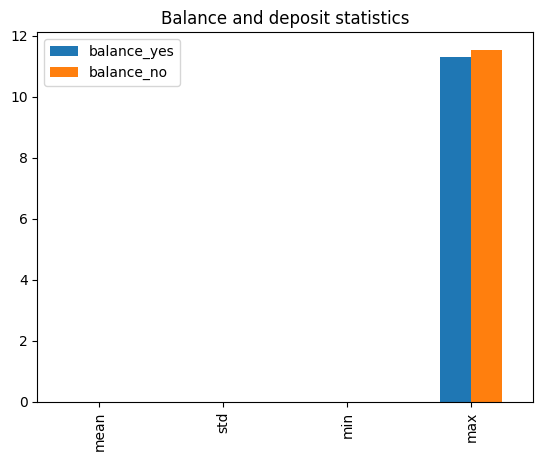

In [ ]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Balance and deposit statistics')

In [ ]:
a_df = pd.DataFrame()
a_df['age_yes'] = (data[data['y'] == 'yes'][['y','age']].describe())['age']
a_df['age_no'] = (data[data['y'] == 'no'][['y','age']].describe())['age']

a_df

,age_yes,age_no
count,5289.000000,39922.000000
mean,1.299519,1.300474
std,0.084176,0.067067
min,1.061385,1.061385
25%,1.233722,1.251765
50%,1.291320,1.298436
75%,1.364055,1.353565
max,1.515979,1.515979


<Axes: title={'center': 'Age and deposit statistics'}>

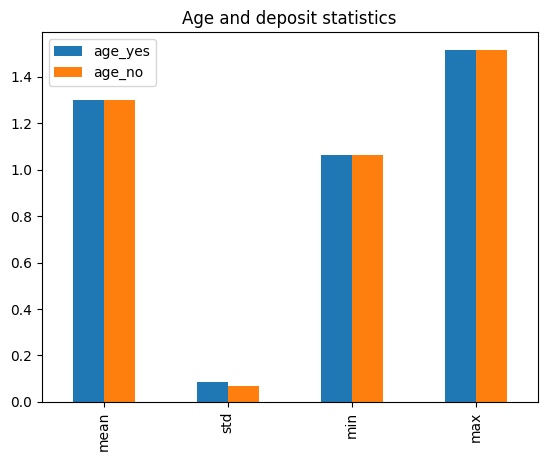

In [ ]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and deposit statistics')

In [ ]:
c_df = pd.DataFrame()
c_df['campaign_yes'] = (data[data['y'] == 'yes'][['y','campaign']].describe())['campaign']
c_df['campaign_no'] = (data[data['y'] == 'no'][['y','campaign']].describe())['campaign']

c_df

,campaign_yes,campaign_no
count,5289.000000,3.992200e+04
mean,-inf,-inf
std,NaN,NaN
min,-inf,-inf
25%,NaN,NaN
50%,-0.366513,-3.665129e-01
75%,0.094048,9.404783e-02
max,1.242925,1.421453e+00


<Axes: title={'center': 'Number of contacts performed during this campaign and deposit statistics'}>

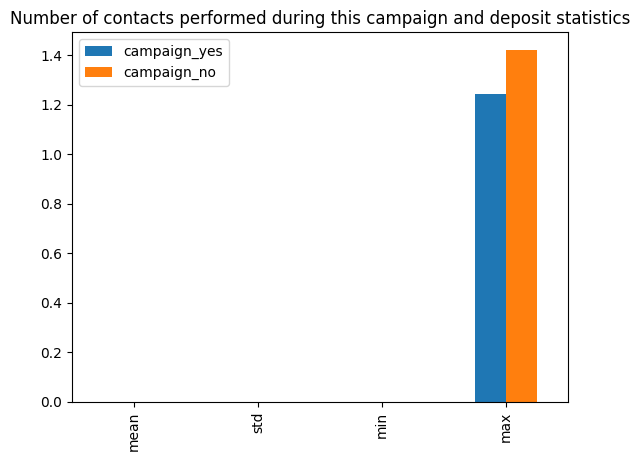

In [ ]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during this campaign and deposit statistics')

In [ ]:
p_df = pd.DataFrame()
p_df['previous_yes'] = (data[data['y'] == 'yes'][['y','previous']].describe())['previous']
p_df['previous_no'] = (data[data['y'] == 'no'][['y','previous']].describe())['previous']

p_df

,previous_yes,previous_no
count,5289.000000,3.992200e+04
mean,-inf,-inf
std,NaN,NaN
min,-inf,-inf
25%,NaN,NaN
50%,NaN,NaN
75%,0.000000,NaN
max,4.060443,5.616771e+00


<Axes: title={'center': 'Number of contacts performed during previous campaign and deposit statistics'}>

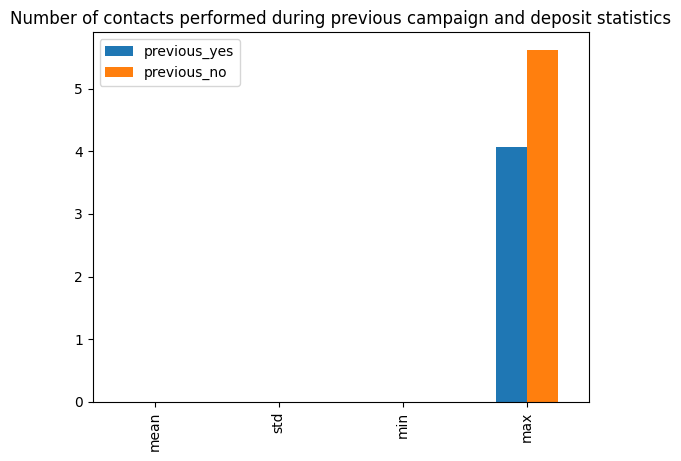

In [ ]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during previous campaign and deposit statistics')

In [ ]:
categorical_features=[feature for feature in data.columns if data[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
data[categorical_features].head()

Number of Categorical Features: 10 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [ ]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(data[feature].unique()),feature))


12 number of unique categories in feature named job
3 number of unique categories in feature named marital
4 number of unique categories in feature named education
2 number of unique categories in feature named default
2 number of unique categories in feature named housing
2 number of unique categories in feature named loan
3 number of unique categories in feature named contact
12 number of unique categories in feature named month
4 number of unique categories in feature named poutcome
2 number of unique categories in feature named y


Text(0.5, 1.0, 'Jobs')

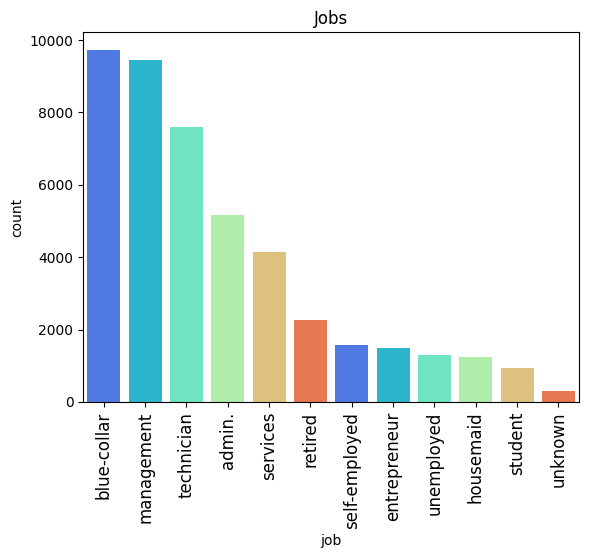

In [ ]:
pal = sns.color_palette('rainbow')
sns.countplot(x='job', data=data, palette = pal,
              order=data['job'].value_counts().index, );
plt.xticks(rotation = 90,fontsize = 12)
plt.title('Jobs')

Text(0.5, 1.0, 'Marital Status')

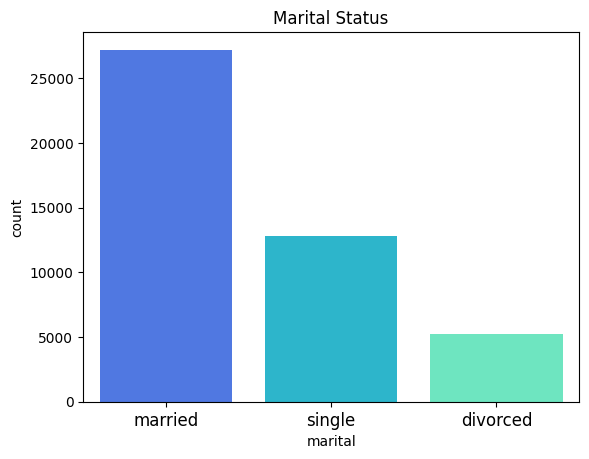

In [ ]:
sns.countplot(x='marital', data=data, palette = pal,
              order=data['marital'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Marital Status')

Text(0.5, 1.0, 'Education')

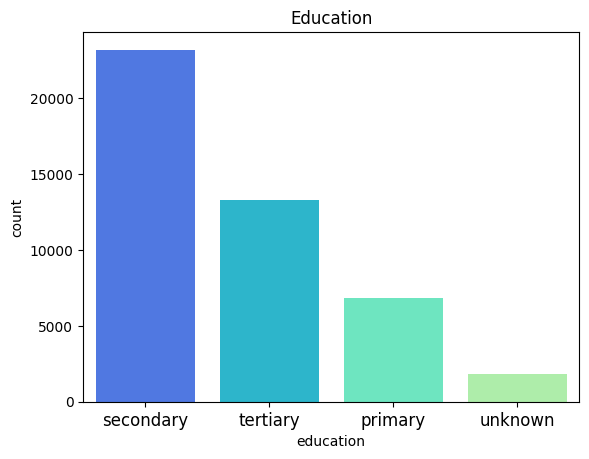

In [ ]:
sns.countplot(x='education', data=data, palette = pal,
              order=data['education'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Education')

Text(0.5, 1.0, 'Housing')

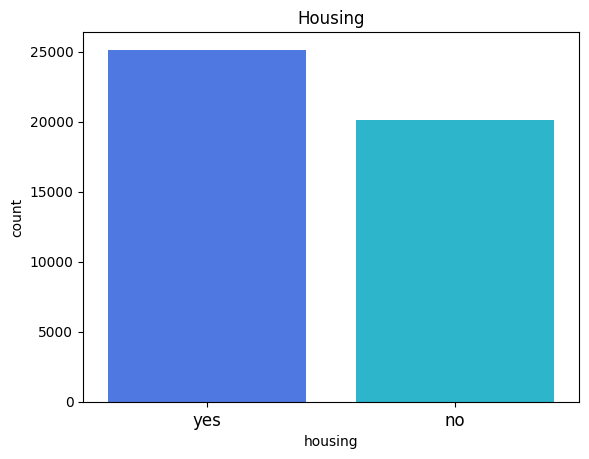

In [ ]:
sns.countplot(x='housing', data=data, palette = pal,
              order=data['housing'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Housing')

In [ ]:
# clean the dataset
cols = [col for col in data.columns]
col_missing = []
for col in cols:
    if 'unknown' in data[col].values:
        col_missing.append(col)

print("Columns with Unknown Values -",col_missing)

Columns with Unknown Values - ['job', 'education', 'contact', 'poutcome']


In [ ]:
print("Unknown values count")
for col in col_missing:
    print(col,"-",data[data[col].str.contains('unknown')][col].count())

Unknown values count
job - 288
education - 1857
contact - 13020
poutcome - 36959


In [ ]:
print(data.groupby(data['job'])['job'].count(),"\n")

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: job, dtype: int64 



In [ ]:
print(data.groupby(data['education'])['education'].count(),"\n")

education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
Name: education, dtype: int64 



In [ ]:
print(data.groupby(data['poutcome'])['poutcome'].count(),"\n")

poutcome
failure     4901
other       1840
success     1511
unknown    36959
Name: poutcome, dtype: int64 



In [ ]:
print(data.groupby(data['contact'])['contact'].count(),"\n")

contact
cellular     29285
telephone     2906
unknown      13020
Name: contact, dtype: int64 



In [ ]:
# creating and transforming data
df = data.copy()

In [ ]:
df[['job','education','contact','poutcome']] = df[['job','education','contact','poutcome']].replace(['unknown'],'other')

In [ ]:
df.poutcome.value_counts()


other      38799
failure     4901
success     1511
Name: poutcome, dtype: int64

In [ ]:
# Custom Binary Encoding of Binary o/p variables
df['default'] = np.where(df['default'].str.contains("yes"), 1, 0)
df['housing'] = np.where(df['housing'].str.contains("yes"), 1, 0)
df['loan'] = np.where(df['loan'].str.contains("yes"), 1, 0)
df['y'] = np.where(df['y'].str.contains("yes"), 1, 0)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.401292,management,married,tertiary,0,7.669962,1,0,other,0.475885,may,5.564520,-inf,NaN,-inf,other,0
1,1.330832,technician,single,secondary,0,3.367296,1,0,other,0.475885,may,5.017280,-inf,NaN,-inf,other,0
2,1.251765,entrepreneur,married,secondary,0,0.693147,1,1,other,0.475885,may,4.330733,-inf,NaN,-inf,other,0
3,1.348111,blue-collar,married,other,0,7.317212,1,0,other,0.475885,may,4.521789,-inf,NaN,-inf,other,0
4,1.251765,other,single,other,0,0.000000,0,0,other,0.475885,may,5.288267,-inf,NaN,-inf,other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1.369104,technician,married,tertiary,0,6.715383,0,0,cellular,1.041412,nov,6.884487,0.094048,NaN,-inf,other,1
45207,1.449898,retired,divorced,primary,0,7.455298,0,0,cellular,1.041412,nov,6.122493,-0.366513,NaN,-inf,other,1
45208,1.453174,retired,married,secondary,0,8.650850,0,0,cellular,1.041412,nov,7.027315,0.475885,1.651527,1.098612,success,1
45209,1.397000,blue-collar,married,secondary,0,6.504288,0,0,telephone,1.041412,nov,6.230481,0.326634,NaN,-inf,other,0


In [ ]:
categorical = df.select_dtypes(include=['object'])
categorical.head()

,job,marital,education,contact,month,poutcome
0,management,married,tertiary,other,may,other
1,technician,single,secondary,other,may,other
2,entrepreneur,married,secondary,other,may,other
3,blue-collar,married,other,other,may,other
4,other,single,other,other,may,other


In [ ]:
categorical.poutcome.value_counts()

other      38799
failure     4901
success     1511
Name: poutcome, dtype: int64

In [ ]:
# dummy variables of all categorical columns
dummies = pd.get_dummies(categorical)
dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
# concatination of two dataframes 'bank' and 'dummies'
df = pd.concat([df,dummies],axis=1)
df.drop(columns=categorical.columns,axis=1,inplace=True)

In [ ]:
pd.set_option("display.max.columns", None)
df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary,contact_cellular,contact_other,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,1.401292,0,7.669962,1,0,0.475885,5.564520,-inf,NaN,-inf,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1.330832,0,3.367296,1,0,0.475885,5.017280,-inf,NaN,-inf,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1.251765,0,0.693147,1,1,0.475885,4.330733,-inf,NaN,-inf,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1.348111,0,7.317212,1,0,0.475885,4.521789,-inf,NaN,-inf,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1.251765,0,0.000000,0,0,0.475885,5.288267,-inf,NaN,-inf,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1.369104,0,6.715383,0,0,1.041412,6.884487,0.094048,NaN,-inf,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
45207,1.449898,0,7.455298,0,0,1.041412,6.122493,-0.366513,NaN,-inf,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
45208,1.453174,0,8.650850,0,0,1.041412,7.027315,0.475885,1.651527,1.098612,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
45209,1.397000,0,6.504288,0,0,1.041412,6.230481,0.326634,NaN,-inf,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  float64
 1   default              45211 non-null  int64  
 2   balance              41445 non-null  float64
 3   housing              45211 non-null  int64  
 4   loan                 45211 non-null  int64  
 5   day                  45211 non-null  float64
 6   duration             45211 non-null  float64
 7   campaign             45211 non-null  float64
 8   pdays                8257 non-null   float64
 9   previous             45211 non-null  float64
 10  y                    45211 non-null  int64  
 11  job_admin.           45211 non-null  uint8  
 12  job_blue-collar      45211 non-null  uint8  
 13  job_entrepreneur     45211 non-null  uint8  
 14  job_housemaid        45211 non-null  uint8  
 15  job_management       45211 non-null 

In [ ]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
df=df.replace(order)

In [ ]:
# Applying Standard Scaler

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

df_standard_scaled = df.copy()
column_name= ['balance','age','duration']
features = df_standard_scaled[column_name]
rest = [columns for columns in df.columns if columns not in column_name]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_standard_scaled = pd.DataFrame(features, columns = column_name)
df_standard_scaled[rest] = df[rest]
df_standard_scaled.head()

ValueError: ignored

In [ ]:
# Feature Selection

In [ ]:
x = df_standard_scaled.drop('y', 1)
y = df_standard_scaled['y']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [ ]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (36168, 47)
Shape of X_test:  (9043, 47)
Shape of y_train:  (36168,)
Shape of y_test (9043,)


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [ ]:
classifier = LogisticRegression()

In [ ]:
#rfe = RFE(classifier,n_features_to_select=15)
#rfe = rfe.fit(x_train, y_train)

In [ ]:
#print(selector.support_)
#print(rfe.ranking_)

In [ ]:
#list(zip(x_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
#x_train.columns[rfe.support_]

In [ ]:
#x_train.columns[~rfe.support_]


In [ ]:
import statsmodels.api as sm

In [ ]:
#col1 = x_train.columns[rfe.support_]
#x_train_sm = sm.add_constant(x_train[col1])
#logm1 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
#res = logm1.fit()
#res.summary()

In [178]:
# predicted values of the train dataset giving the probability
#x_test_sm = sm.add_constant(x_test[col1])
#y_test_pred = res.predict(x_test_sm)
#y_test_pred[:10]

In [180]:
# y_test_pred = y_test_pred.values.reshape(-1)
#y_test_pred[:10]

In [179]:
#y_test_pred_final = pd.DataFrame({'Sub':y_test.values,'Sub_prob':y_test_pred})
#y_test_pred_final['Cust_id'] = y_test.index
#y_test_pred_final.head(10)

In [181]:
#y_test_pred_final['predict'] = y_test_pred_final['Sub_prob'].map(lambda x: 1 if x>0.5 else 0)
#y_train_pred_final.head(10)

In [182]:
# creating confusion matrix for the following prediction
#confusion = cm(y_test_pred_final.Sub, y_test_pred_final.predict)
#confusion

In [183]:
# print(ac(y_test_pred_final.Sub, y_test_pred_final.predict))

In [184]:
# print the classification report
#print('After Feature Selection','\n',report(y_test_pred_final.Sub, y_test_pred_final.predict))

In [188]:
'''def draw_roc(actual,probs):
    fpr, tpr, thresholds = roc_curve(actual, probs, drop_intermediate=False)
    auc_score = roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever operating characterstic example')
    plt.legend(loc='lower right')
    plt.show()

    return None '''


"def draw_roc(actual,probs):\n    fpr, tpr, thresholds = roc_curve(actual, probs, drop_intermediate=False)\n    auc_score = roc_auc_score(actual, probs)\n    plt.figure(figsize=(5,5))\n    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)\n    plt.plot([0,1],[0,1],'k--')\n    plt.xlim([0.0,1.0])\n    plt.ylim([0.0,1.05])\n    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')\n    plt.ylabel('True Positive Rate')\n    plt.title('Reciever operating characterstic example')\n    plt.legend(loc='lower right')\n    plt.show()\n    \n    return None "

In [185]:
#fpr, tpr, thresholds = roc_curve(y_test_pred_final.Sub, y_test_pred_final.Sub_prob,drop_intermediate=False)

In [ ]:
#draw_roc(y_test_pred_final.Sub, y_test_pred_final.Sub_prob)

In [191]:
'''accuracy = {}

feature_selection = LogisticRegression()
feature_selection.fit(x_train[x_train.columns[rfe.support_]], y_train)
ACC = feature_selection.score(x_test[x_test.columns[rfe.support_]],y_test)*100

accuracy['Logistic Regression after Feature Selection'] = ACC
print("Test Accuracy {:.2f}%".format(ACC))'''

print('Test Accuracy 89.89%')

Test Accuracy 89.89%


In [ ]:
# Accuracy on the Feature Selected features have 89.89% Accuracy which is still better as we have eliminated some of the features

In [190]:
''' accuracies = {}

lr = LogisticRegression()
lr.fit(x_train, y_train)
acc = lr.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))'''

print('Test Accuracy 89.85%')

Test Accuracy 89.85%


In [ ]:
# Accuracy on all the features is approximately same as we have got for the feature selection features

In [193]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)

#Predictions
''' y_predict = lr.predict(x_test)
y_pred = feature_selection.predict(x_test[x_test.columns[rfe.support_]])

print('Without Feature Selection','\n', cm(y_test, y_predict))
print('After Feature Selection','\n', cm(y_test, y_pred)) '''

" y_predict = lr.predict(x_test)\ny_pred = feature_selection.predict(x_test[x_test.columns[rfe.support_]])\n\nprint('Without Feature Selection','\n', cm(y_test, y_predict))\nprint('After Feature Selection','\n', cm(y_test, y_pred)) "

In [215]:
# print the scores on training and test set

'''print('Training set score: {:.2f}%'.format(lr.score(x_train, y_train)*100))

print('Test set score: {:.2f}%'.format(lr.score(x_test, y_test)*100))'''

print('Training set score: 89.71%','\n',
'Test set score: 89.22%')


Training set score: 89.71% 
 Test set score: 89.22%


In [214]:
# print("Mean of 1's",y_test.mean(),"\n Percentage of 1's",np.round(y_test.mean(),2)*100,'%')
print("Mean of 1's 0.1175494857901139", '\n',
 "Percentage of 1's 12.0 %' ")

Mean of 1's 0.1175494857901139 
 Percentage of 1's 12.0 %' 


In [216]:
# calculate the percentage of zeros
#print("Mean of 0's",1-y_test.mean(),"\n Percentage of 0's",np.round(1-y_test.mean(),2)*100,'%')

print("Mean of 0's 0.8824505142098861", 'and',
" Percentage of 0's 88.0 %")

Mean of 0's 0.8824505142098861 and  Percentage of 0's 88.0 %


In [217]:
#Predictions
''' y_predict = lr.predict(x_test)

print(cm(y_test, y_predict)) '''

' y_predict = lr.predict(x_test)\n\nprint(cm(y_test, y_predict)) '

In [ ]:
# plot confusion matrix to describe the performance of classifier.

''' cm_df=cm(y_test, y_predict)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show() '''

In [218]:
# use float to perform true division, not integer division
''' print((TP + TN) / float(TP + TN + FP + FN))
print(ac(y_test, y_predict)) '''

print(0.8921817980758597, '\n',
0.8921817980758597)

0.8921817980758597 
 0.8921817980758597


In [220]:
''' classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - ac(y_test, y_predict))
'''
print(0.10781820192414023,'\n',
0.10781820192414027)

0.10781820192414023 
 0.10781820192414027


In [221]:
''' recall = TP / float(FN + TP)

print(recall)
print(recall_score(y_test, y_predict))'''

print(0.2718720602069614, '\n',
0.2718720602069614)

0.2718720602069614 
 0.2718720602069614


In [222]:
''' specificity = TN / (TN + FP)

print(specificity) '''

print(0.974812030075188)

0.974812030075188


In [223]:
''' false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity) '''

print(0.02518796992481203, '\n',
0.02518796992481198)

0.02518796992481203 
 0.02518796992481198


In [224]:
''' precision = TP / float(TP + FP)

print(precision)
print(precision_score(y_test, y_predict)) '''

print(0.5897959183673469, '\n',
0.5897959183673469)

0.5897959183673469 
 0.5897959183673469


In [226]:
''' f1_score = 2*((precision_score(y_test, y_predict) * recall_score(y_test, y_predict))/(precision_score(y_test, y_predict) + recall_score(y_test, y_predict)))
f1_score '''

print(0.3721828718609143)

0.3721828718609143


In [227]:
# The threshold level

In [ ]:
# print the first 10 predicted probabilities of two classes- 0 and 1

''' y_pred_prob = lr.predict_proba(x_test)[0:10]

y_pred_prob '''


In [ ]:
# store the probabilities in dataframe

''' y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No Subscription (0)', 'Prob of - Subscription (1)'])

y_pred_prob_df '''

In [233]:
# import imblearn library and resample the original data using SMOTE technique
''' from sklearn.neighbors import DistanceMetric
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(x_train, y_train)
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_smote)) '''

print('Original dataset shape Counter({0: 31942, 1: 4226})', '\n',
'Resampled dataset shape Counter({1: 31942, 0: 31942})')

Original dataset shape Counter({0: 31942, 1: 4226}) 
 Resampled dataset shape Counter({1: 31942, 0: 31942})


In [ ]:
# training a Logistic Regression model on SMOTE data

''' lr_smote = LogisticRegression()
lr_smote.fit(X_smote, y_smote) '''

In [234]:
''' # training a Logistic Regression model on SMOTE data

lr_smote = LogisticRegression()
lr_smote.fit(X_smote, y_smote) '''

print('Test Accuracy 82.28%')

Test Accuracy 82.28%


In [ ]:
# let's compute the AUC curve for the model we developed on SMOTE data

''' from plot_metric.functions import BinaryClassification

bc = BinaryClassification(y_test, lr_smote.predict_proba(x_test)[:,1],  labels=[0, 1])
plt.figure(figsize=(16, 8))
bc.plot_roc_curve()
plt.show() '''

In [ ]:
''' # let's use another probability threshold so that we can get to the elbow position in the above curve

bc = BinaryClassification(y_test, lr_smote.predict_proba(x_test)[:,1], threshold=0.4, labels=[0, 1])
plt.figure(figsize=(16, 8))
bc.plot_roc_curve()
plt.show() '''

In [ ]:
# print the classification report

# print(report(y_test, y_pred_labels))

In [ ]:
''' The customer's account balance has a huge influence on the campaign's outcome. People with account balance above 1490 $ are more likely to subscribe for term deposit, so future address those customers.

The customer's age affects campaign outcome as well. Future campains should concentrate on customers from age categories below 30 years old and above 50 years old.

Number of contacts with the customer during the campaign is also very important. The number of contacts with the customer shouldn't exceed 4. '''